In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import smart_resize
from tensorflow.keras import backend as K
from tensorflow.keras.utils import image_dataset_from_directory, load_img, img_to_array, array_to_img, plot_model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
from functools import partial

# Указываем разрешение для изображений к единому формату
image_width, image_height = 250, 250 

#Указываем путь к обучающей выборке
directory_data_train= r'C:\Users\Kartoshechka\Desktop\RO\nn\train' 

#Указываем путь к проверочной выборке
directory_data_validation= r'C:\Users\Kartoshechka\Desktop\RO\nn\validation'  

# Сразу устанавливаем необходимые параметры
train_sample = 74 + 55
validation_sample = 19 + 20
epochs = 12
lot_size = 25  #batch_size 
if K.image_data_format() != 'channels_first':
     input_shape = (image_width, image_height, 3)
else:
     input_shape = (3, image_width, image_height)  

In [38]:
pattern = Sequential() # Создание модели

# Первый слой нейросети
pattern.add(Conv2D(32, (3, 3), input_shape=input_shape))
pattern.add(Activation('relu'))
pattern.add(MaxPooling2D(pool_size=(2, 2)))

# Второй слой нейросети
pattern.add(Conv2D(32, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(MaxPooling2D(pool_size=(2, 2)))

# Третий слой нейросети
pattern.add(Conv2D(64, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(MaxPooling2D(pool_size=(2, 2)))

# Aктивация, свертка, объединение, исключение
pattern.add(Flatten())
pattern.add(Dense(64))
pattern.add(Activation('relu'))
pattern.add(Dropout(0.5))
pattern.add(Dense(2))# число классов
pattern.add(Activation('softmax'))

# Cкомпилируем модель с выбранными параметрами. Также укажем метрику для оценки.
pattern.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [39]:
# Загрузка весов модели
pattern.load_weights('car.h5')

In [40]:
# Задаём параметры аугментации
train_datagen = ImageDataGenerator(
    rescale=1. / 255, # коэффициент масштабирования
    shear_range=0.2, # Интенсивность сдвига
    zoom_range=0.2, # Диапазон случайного увеличения
    horizontal_flip=True) # Произвольный поворот по горизонтали
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [41]:
#Предобработка обучающей выборки
train_processing = train_datagen.flow_from_directory(
    directory_data_train,
    target_size=(image_width, image_height), # Размер изображений
    batch_size=lot_size, #Размер пакетов данных
    class_mode='categorical') # Режим класса

#Предобработка тестовой выборки
validation_processing= test_datagen.flow_from_directory(
    directory_data_validation,
    target_size=(image_width, image_height),
    batch_size=lot_size,
    class_mode='categorical')

Found 129 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [42]:
history = pattern.fit(
    # Помещаем обучающую выборку
    train_processing, 
    
    #количество итераций пакета до того, как период обучения считается завершенным
    steps_per_epoch=train_sample // lot_size, 
    
    # Указываем количество эпох
    epochs=epochs, 
    
    # Помещаем проверочную выборку
    validation_data=validation_processing, 
    
    # Количество итерации, но на проверочном пакете данных
    validation_steps=validation_sample  // lot_size) 

Epoch 1/12
5/5 [==============================] - 2s 413ms/step - loss: 0.5274 - accuracy: 0.8654 - val_loss: 0.0738 - val_accuracy: 0.9600
Epoch 2/12
5/5 [==============================] - 2s 402ms/step - loss: 0.2964 - accuracy: 0.9808 - val_loss: 0.0214 - val_accuracy: 1.0000
Epoch 3/12
5/5 [==============================] - 2s 388ms/step - loss: 0.1349 - accuracy: 0.9615 - val_loss: 0.0677 - val_accuracy: 0.9600
Epoch 4/12
5/5 [==============================] - 2s 394ms/step - loss: 0.3084 - accuracy: 0.9038 - val_loss: 0.0497 - val_accuracy: 0.9600
Epoch 5/12
5/5 [==============================] - 2s 449ms/step - loss: 0.0945 - accuracy: 0.9760 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 6/12
5/5 [==============================] - 2s 484ms/step - loss: 0.3356 - accuracy: 0.9327 - val_loss: 0.1023 - val_accuracy: 0.9600
Epoch 7/12
5/5 [==============================] - 2s 393ms/step - loss: 0.0950 - accuracy: 0.9615 - val_loss: 0.1111 - val_accuracy: 0.9600
Epoch 8/12
5/5 [====

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 248, 248, 32)      896       
_________________________________________________________________
activation_20 (Activation)   (None, 248, 248, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 122, 122, 32)      9248      
_________________________________________________________________
activation_21 (Activation)   (None, 122, 122, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 59, 59, 64)       

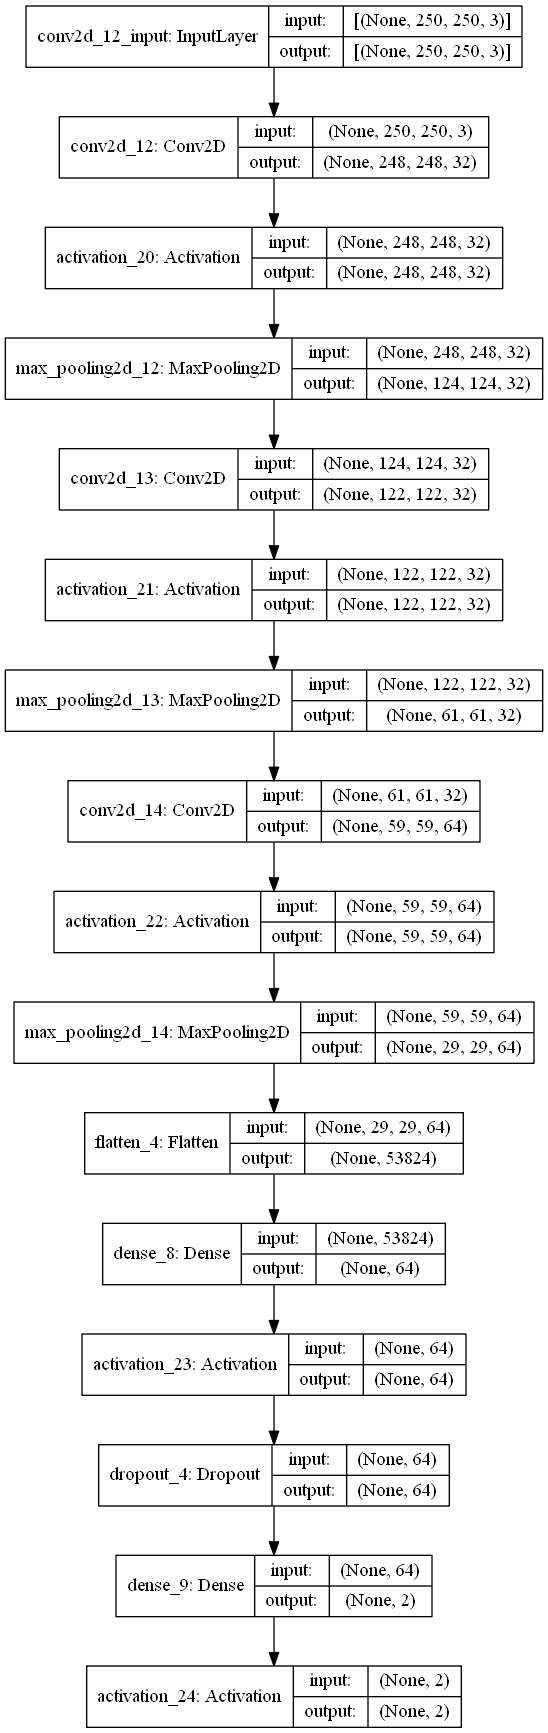

In [43]:
pattern.summary()
plot_model(pattern, show_shapes=True)

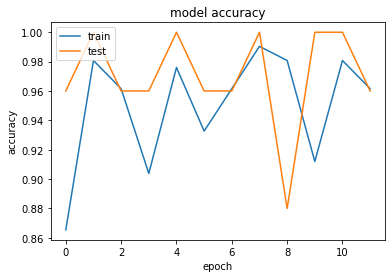

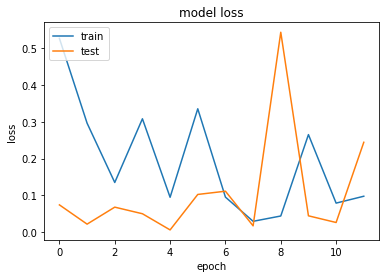

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
pattern.save_weights('car.h5') #Сохранение весов модели
pattern.save('path') #Сохранение модели

INFO:tensorflow:Assets written to: path\assets


In [45]:
pattern.load_weights('car.h5') # Загрузка весов модели

In [7]:
# импортируем карту парковки
parking_regions = json.load(open('parking_map.json'))['regions']
def getSquares(region):
    all_x = region['shape_attributes']['all_points_x']
    all_y = region['shape_attributes']['all_points_y']
    return {'x1': min(all_x), 'x2': max(all_x), 'y1': min(all_y), 'y2': max(all_y)}

regions = list(map(getSquares, parking_regions))

In [8]:
image = load_img('test/input (1).png', target_size=(720, 1280))
image_arr = img_to_array(image)

def getImage(img, target_size, region):
    cut_image = img[region['y1']:region['y2'], region['x1']:region['x2'], : ]
    return smart_resize(cut_image, target_size)

# нарезаем входное изображение согласно карте парковки
parking_images = np.array(list(map(
    partial(getImage, image_arr, (image_height, image_width)), 
    regions
)))

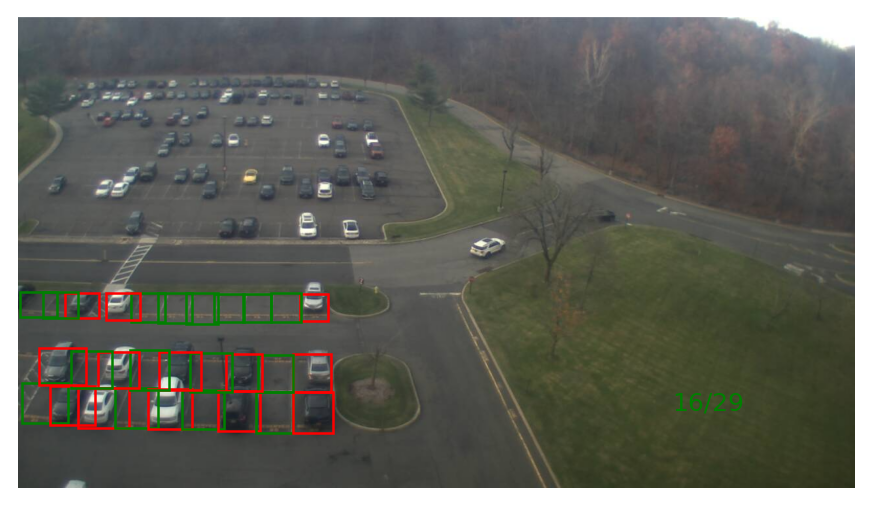

In [9]:
# распознаем отдельно парковочные места
predictions = pattern.predict(parking_images)

# создаем фигуру и оси
fig, ax = plt.subplots()

# рисуем изображение
ax.imshow(image)  
ax.axis('off')

empties = 0
for i, pred in enumerate(predictions): 
    # считаем свободные места
    if pred[0] <= 0.5: 
        empties += 1
    
    # создаем прямоугольник
    start = (regions[i]['x1'], regions[i]['y1'])
    width = regions[i]['x2'] - regions[i]['x1']
    height = regions[i]['y2'] - regions[i]['y1']
    color = 'r' if pred[0] > 0.5 else 'g'
    rect = patches.Rectangle(start, width, height, linewidth=1, edgecolor=color, facecolor='none')
    ax.add_patch(rect)

# пишем кол-во свободных парковочных мест
plt.text(
    1000, 600, 
    '{}/{}'.format(empties, len(regions)),
    color='g'
)

fig.set_dpi(180)
plt.show()

fig.savefig('output.png', dpi=300, bbox_inches='tight')

In [10]:
print('Свободных парковочных мест {} из {}'.format(empties, len(regions)))

Свободных парковочных мест 16 из 29


input (1).png


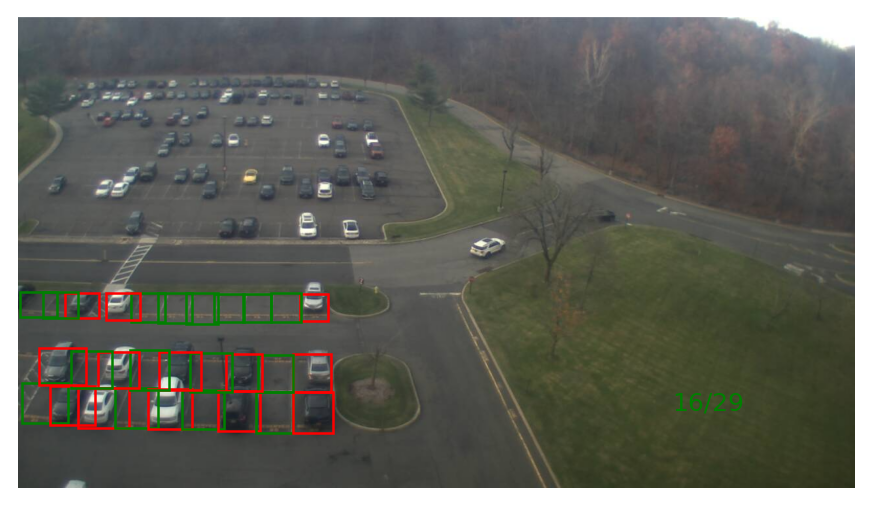

input (10).png


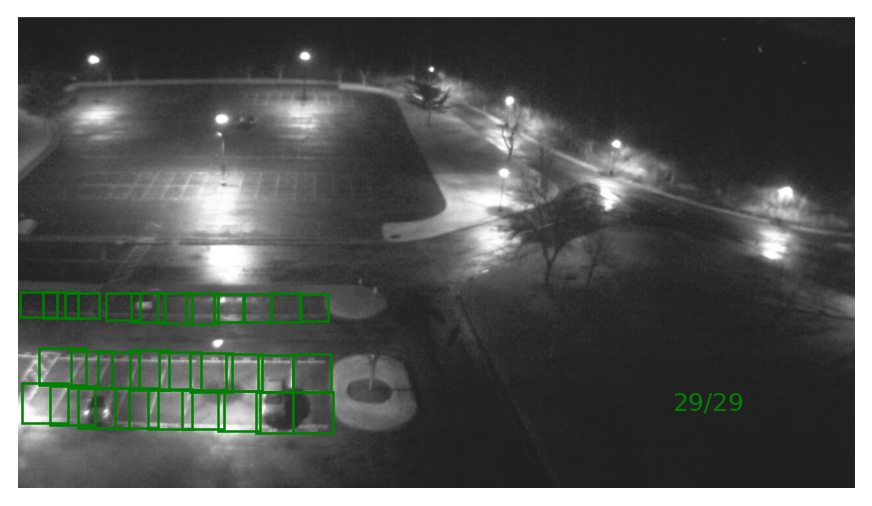

input (11).png


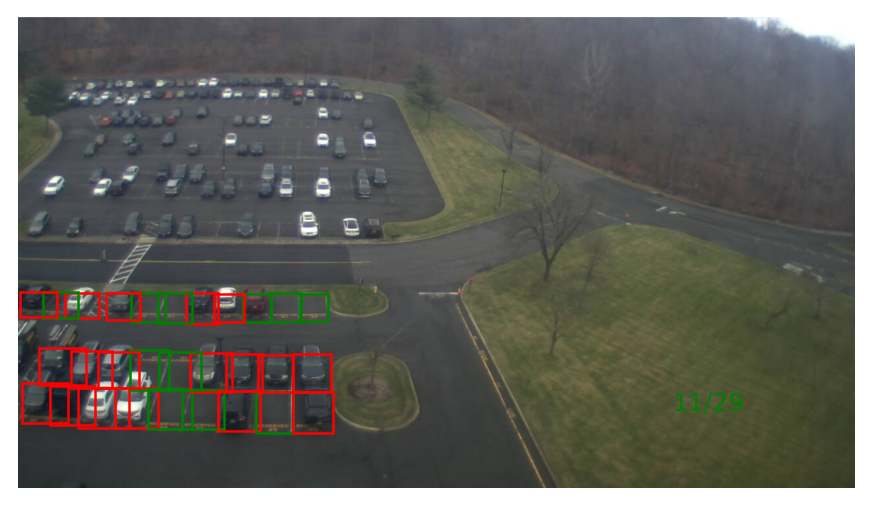

input (12).png


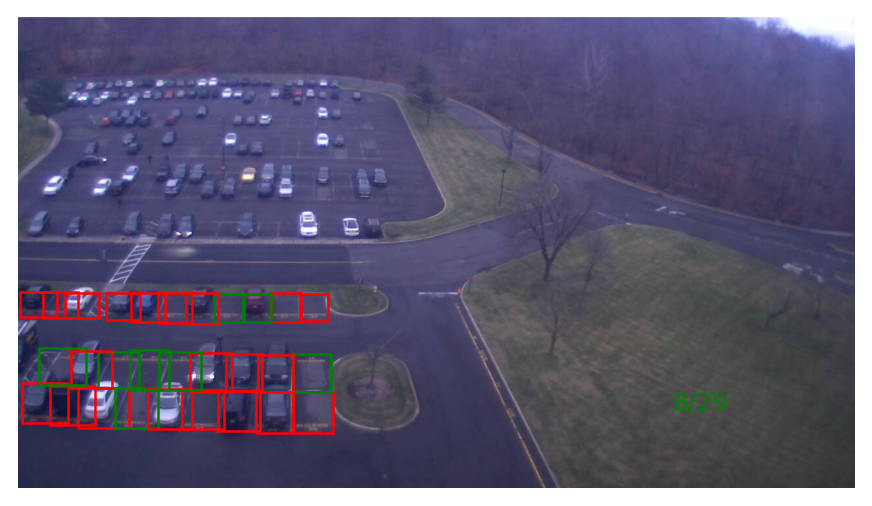

input (13).png


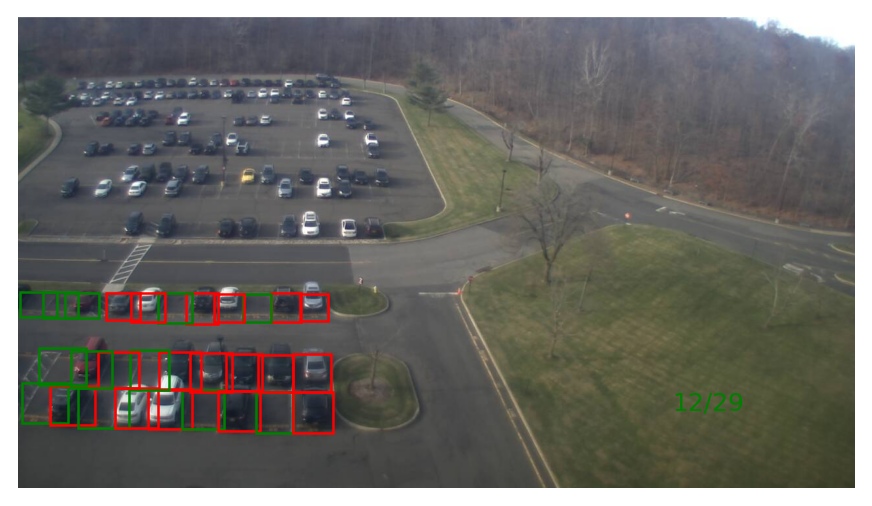

input (2).png


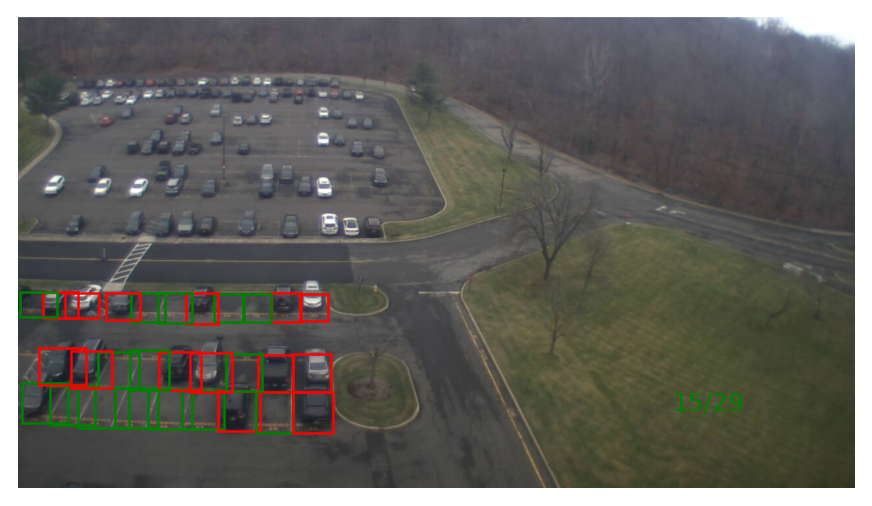

input (3).png


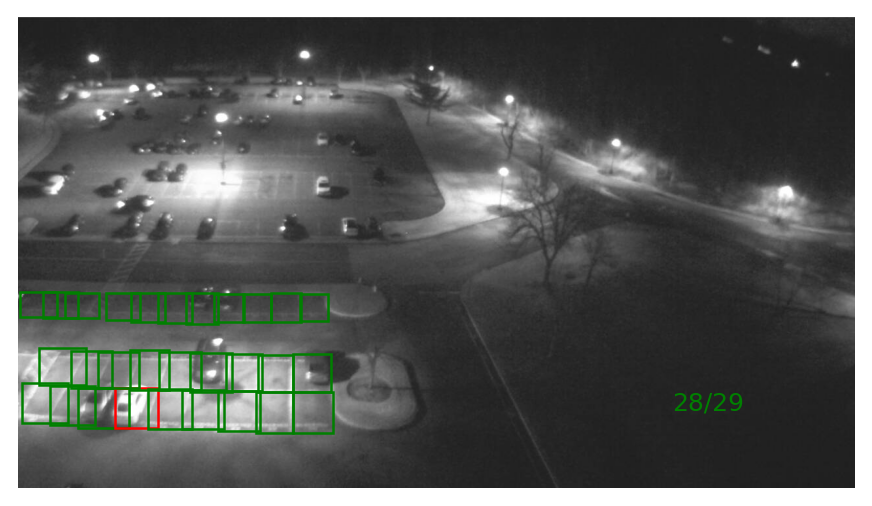

input (4).png


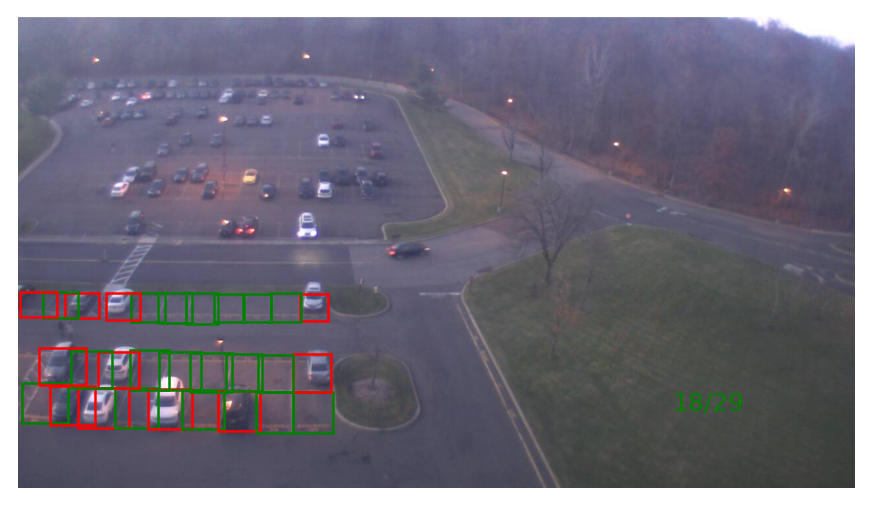

input (5).png


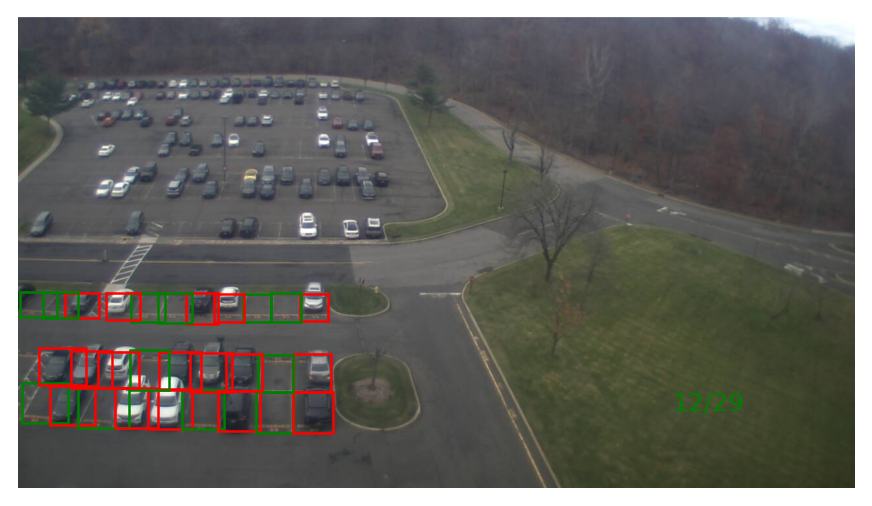

input (6).png


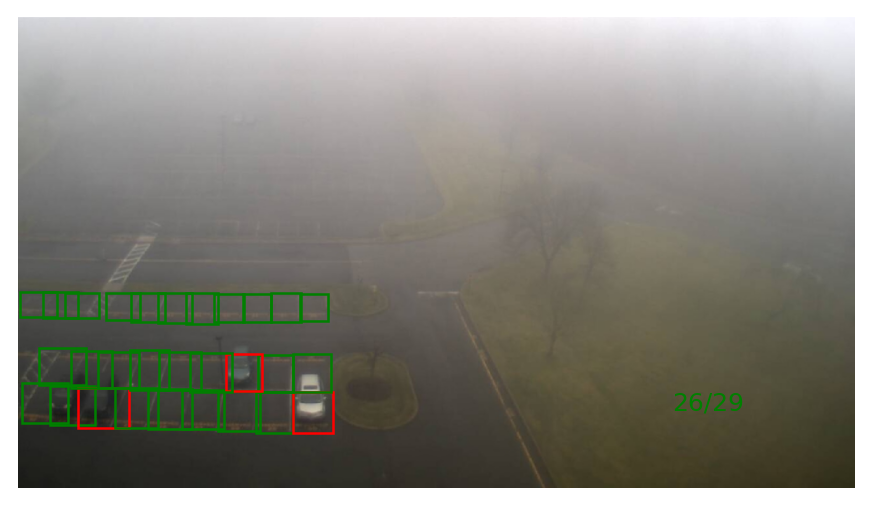

input (7).png


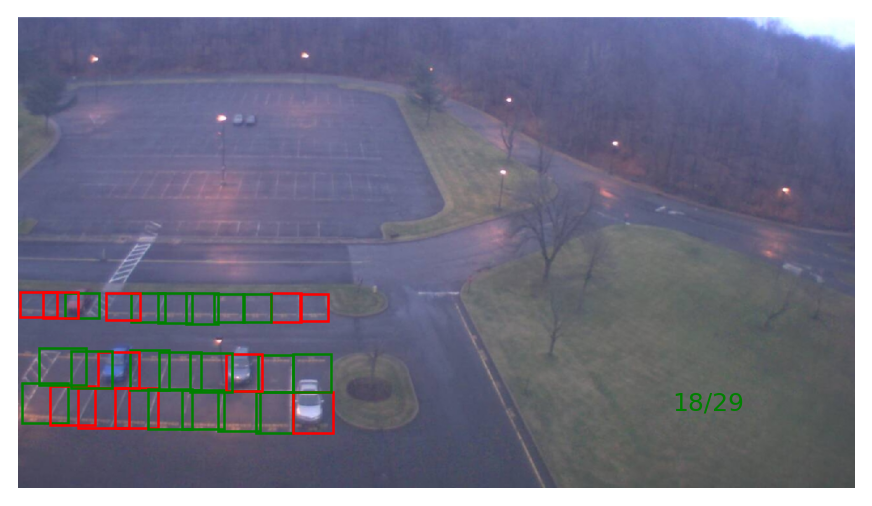

input (8).png


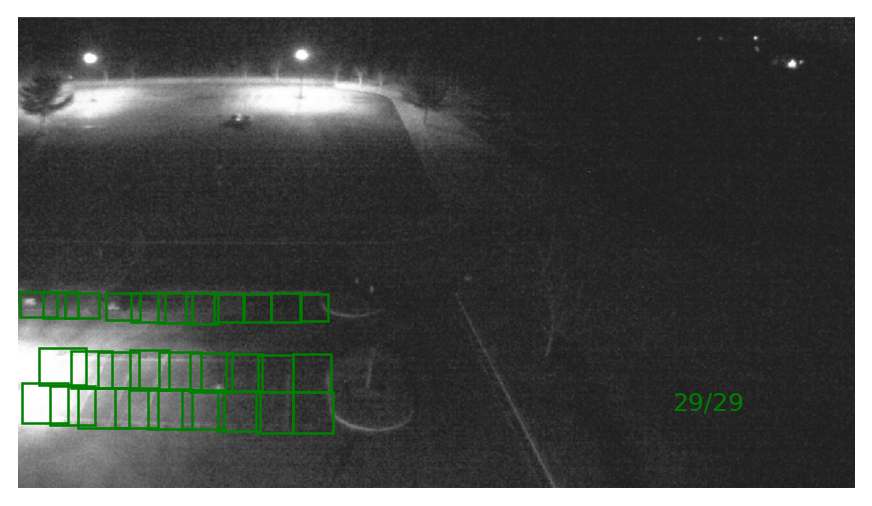

input (9).png


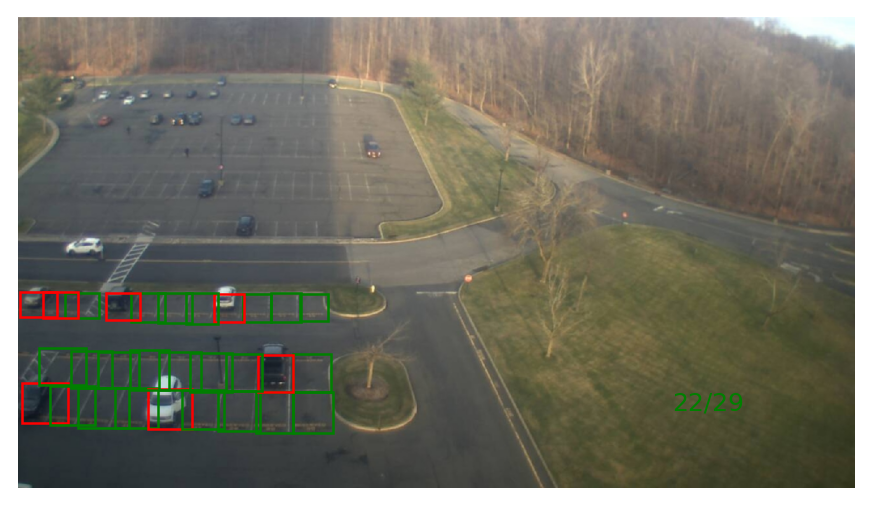

In [15]:
# массовый режим

import os
test_images = os.listdir('test')

for test_image in test_images:
    print(test_image)
    image = load_img('test/' + test_image, target_size=(720, 1280))
    image_arr = img_to_array(image)

    def getImage(img, target_size, region):
        cut_image = img[region['y1']:region['y2'], region['x1']:region['x2'], : ]
        return smart_resize(cut_image, target_size)

    # нарезаем входное изображение согласно карте парковки
    parking_images = np.array(list(map(
        partial(getImage, image_arr, (image_height, image_width)), 
        regions
    )))
    # распознаем отдельно парковочные места
    predictions = pattern.predict(parking_images)

    # создаем фигуру и оси
    fig, ax = plt.subplots()

    # рисуем изображение
    ax.imshow(image)  
    ax.axis('off')

    empties = 0
    for i, pred in enumerate(predictions): 
        # считаем свободные места
        if pred[0] <= 0.5: 
            empties += 1

        # создаем прямоугольник
        start = (regions[i]['x1'], regions[i]['y1'])
        width = regions[i]['x2'] - regions[i]['x1']
        height = regions[i]['y2'] - regions[i]['y1']
        color = 'r' if pred[0] > 0.5 else 'g'
        rect = patches.Rectangle(start, width, height, linewidth=1, edgecolor=color, facecolor='none')
        ax.add_patch(rect)

    # пишем кол-во свободных парковочных мест
    plt.text(
        1000, 600, 
        '{}/{}'.format(empties, len(regions)),
        color='g'
    )

    fig.set_dpi(180)
    plt.show()